In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import json
import numpy as np
import requests

In [3]:
ontimeMarketing = ("T_ONTIME_MARKETING.csv")

airlineData = pd.read_csv(ontimeMarketing, encoding="utf-8", low_memory=False)  # Add "low_memory" parameter to improve memory usage during parsing
cleanAirlineData = airlineData[["ORIGIN_CITY_NAME", "ORIGIN_STATE_ABR", "DEST_CITY_NAME",
                                "DEST_STATE_ABR", "CRS_DEP_TIME", "DEP_TIME", "DEP_DELAY", "TAXI_OUT", "TAXI_IN", "ARR_TIME",
                                "ARR_DELAY", "CANCELLED", "CANCELLATION_CODE", "DIVERTED", "CARRIER_DELAY", "WEATHER_DELAY",
                                "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY", "DIV_AIRPORT_LANDINGS", "DIV_ACTUAL_ELAPSED_TIME"]]
cleanAirlineData

,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_CITY_NAME,DEST_STATE_ABR,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_TIME,...,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_AIRPORT_LANDINGS,DIV_ACTUAL_ELAPSED_TIME
0,"New York, NY",NY,"Los Angeles, CA",CA,900,852.0,-8.0,18.0,5.0,1124.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0,NaN
1,"Los Angeles, CA",CA,"New York, NY",NY,1235,1232.0,-3.0,17.0,12.0,2107.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0,NaN
2,"Boston, MA",MA,"Los Angeles, CA",CA,1800,1754.0,-6.0,18.0,8.0,2041.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0,NaN
3,"Los Angeles, CA",CA,"Boston, MA",MA,750,742.0,-8.0,20.0,15.0,1638.0,...,0.0,NaN,0.0,0.0,0.0,19.0,0.0,0.0,0,NaN
4,"Phoenix, AZ",AZ,"Portland, OR",OR,1502,1458.0,-4.0,22.0,5.0,1654.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582420,"Phoenix, AZ",AZ,"Los Angeles, CA",CA,1200,1203.0,3.0,12.0,5.0,1218.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0,NaN
582421,"Seattle, WA",WA,"Denver, CO",CO,1800,1842.0,42.0,15.0,5.0,2218.0,...,0.0,NaN,0.0,0.0,0.0,6.0,0.0,42.0,0,NaN
582422,"Orlando, FL",FL,"Austin, TX",TX,705,703.0,-2.0,18.0,4.0,907.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0,NaN
582423,"Los Angeles, CA",CA,"Sacramento, CA",CA,1315,1430.0,75.0,15.0,3.0,1549.0,...,0.0,NaN,0.0,69.0,0.0,0.0,0.0,0.0,0,NaN


In [4]:
dallasAirlines = cleanAirlineData.loc[(cleanAirlineData["ORIGIN_CITY_NAME"] == "Dallas, TX") |
                                  (cleanAirlineData["DEST_CITY_NAME"] == "Dallas, TX")].fillna(0.0)
DAL = dallasAirlines
DAL

,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_CITY_NAME,DEST_STATE_ABR,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_TIME,...,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_AIRPORT_LANDINGS,DIV_ACTUAL_ELAPSED_TIME
4831,"Seattle, WA",WA,"Dallas, TX",TX,731,730.0,-1.0,17.0,5.0,1319.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4832,"Dallas, TX",TX,"Seattle, WA",WA,1428,1436.0,8.0,12.0,7.0,1638.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
5222,"San Francisco, CA",CA,"Dallas, TX",TX,1335,1324.0,-11.0,23.0,5.0,1854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
5223,"Dallas, TX",TX,"San Francisco, CA",CA,2008,2002.0,-6.0,17.0,4.0,2135.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
7290,"Dallas, TX",TX,"Atlanta, GA",GA,600,603.0,3.0,70.0,12.0,949.0,...,0.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582309,"Dallas, TX",TX,"Las Vegas, NV",NV,2015,2021.0,6.0,10.0,2.0,2054.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
582369,"Dallas, TX",TX,"San Diego, CA",CA,1255,1255.0,0.0,14.0,3.0,1355.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
582370,"Chicago, IL",IL,"Dallas, TX",TX,930,927.0,-3.0,15.0,3.0,1130.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
582396,"Dallas, TX",TX,"Chicago, IL",IL,705,700.0,-5.0,8.0,4.0,903.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [7]:
DAL_delay = DAL
count_carrier_delay = len(DAL_delay[DAL_delay['CARRIER_DELAY'] > 0])
count_weather_delay = len(DAL_delay[DAL_delay['WEATHER_DELAY'] > 0])
count_nas_delay = len(DAL_delay[DAL_delay['NAS_DELAY'] > 0])
count_security_delay = len(DAL_delay[DAL_delay['SECURITY_DELAY'] > 0])
count_late_aircraft_delay = len(DAL_delay[DAL_delay['LATE_AIRCRAFT_DELAY'] > 0])

In [8]:
delay_types = ["CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY"]
counts = [count_carrier_delay, count_weather_delay, count_nas_delay, count_security_delay, count_late_aircraft_delay]


In [12]:
delay_counts = {
    "CARRIER_DELAY": count_carrier_delay,
    "WEATHER_DELAY": count_weather_delay,
    "NAS_DELAY": count_nas_delay,
    "SECURITY_DELAY": count_security_delay,
    "LATE_AIRCRAFT_DELAY": count_late_aircraft_delay
}

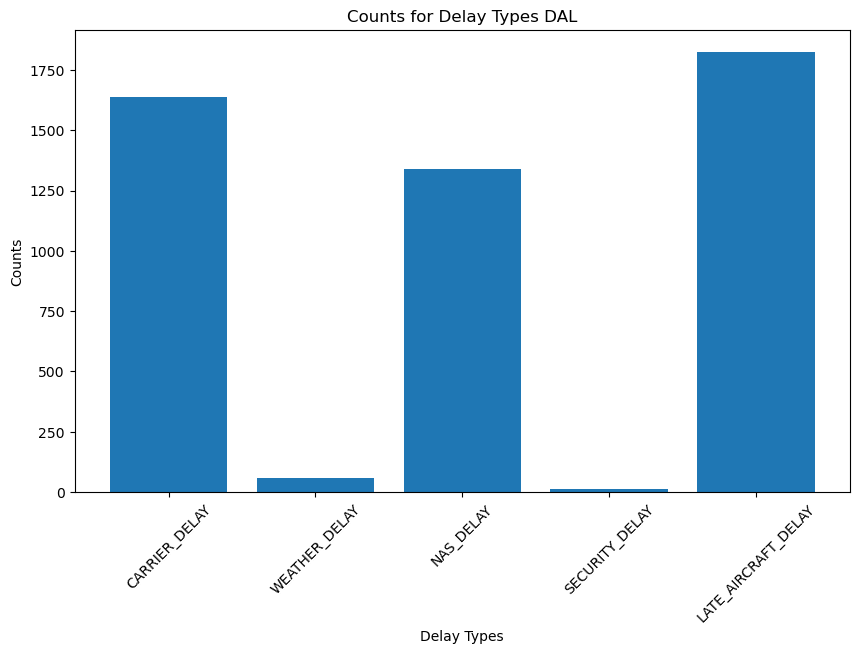

In [16]:
filtered_counts = [count for count in counts if count > 0]
plt.figure(figsize=(10, 6))
plt.bar(delay_types, filtered_counts)
plt.xlabel("Delay Types")
plt.ylabel("Counts")
plt.title("Counts for Delay Types DAL")
plt.xticks(rotation=45)

plt.show()

<BarContainer object of 5 artists>

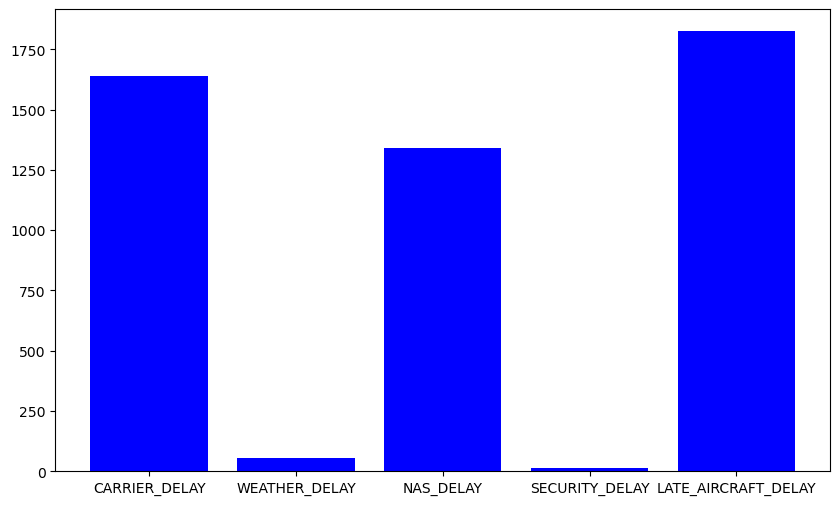

In [10]:
plt.figure(figsize=(10, 6))
plt.bar(delay_types, [delay_counts[type] for type in delay_types], color='blue')
